# Regression with MLP in Keras using RVE engineering coefficients

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data set
is generated based on FE simulation (["E11", "E22", "E33", 
                       "nu12", "nu21", "nu13", "nu31", "nu23", "nu32", 
                        "G12", "G23", "G13","phiF"]) \
                        and Ghane_2020 analytical 
                         model for woven RVEs(["Ex", "Ey", "Gxy", "nu_xy"])

In [110]:
pwd

'C:\\Users\\xghaeh\\C Documents\\Ehsan code\\Phase 1 project on elasticity'

In [111]:
# To examine using fewer data points:
num_of_data_points = 'InputForKeras-300datapoint'
df = pd.read_excel("features_final_version.xlsx", sheet_name = num_of_data_points)

In [112]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,300.0,150.500000,86.746758,1.000000,75.750000,150.500000,225.250000,300.000000
RVE,300.0,2.003333,0.819896,1.000000,1.000000,2.000000,3.000000,3.000000
FEM,300.0,50.503333,28.920083,1.000000,25.750000,50.500000,75.250000,101.000000
redundant,300.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
d,300.0,60.000000,0.000000,60.000000,60.000000,60.000000,60.000000,60.000000
l,300.0,70.000000,0.000000,70.000000,70.000000,70.000000,70.000000,70.000000
phiF,300.0,0.449576,0.086657,0.301172,0.374707,0.449414,0.524121,0.598828
PHI [-],300.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
THETA [-],300.0,90.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
PSI,300.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [113]:
Features = df[['phiF','EM','nuM','EF','nuF']]
#.to_numpy(np.float32)any
Output = df[['E11','E22','nu12','nu13','nu23','G12','G13','G23']]

In [114]:
Features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
phiF,300.0,0.449576,0.086657,0.301172,0.374707,0.449414,0.524121,0.598828
EM,300.0,6748.603516,1871.683674,3525.390625,5144.042969,6737.304688,8355.957031,9974.609375
nuM,300.0,0.370417,0.069333,0.250937,0.309883,0.369766,0.429648,0.489531
EF,300.0,430589.271484,206642.717522,71801.171875,250375.878906,428950.585938,607525.292969,784699.414062
nuF,300.0,0.299965,0.057590,0.200391,0.250293,0.299609,0.349414,0.399219


In [115]:
Output.describe().transpose()
#G13 is found equal to G12
#E33 is also found almost equal to E22

,count,mean,std,min,25%,50%,75%,max
E11,300.0,192976.819800,99823.739835,4896.330000,106666.675000,187560.000000,265766.675000,442233.300000
E22,300.0,23804.140000,11308.649898,4896.330000,15737.170000,21524.170000,29232.417500,84310.000000
nu12,300.0,0.335220,0.047588,0.231783,0.301407,0.333950,0.368900,0.450100
nu13,300.0,0.336326,0.048495,0.231683,0.302404,0.335600,0.370542,0.455300
nu23,300.0,0.469030,0.132469,0.254083,0.358858,0.442767,0.558475,0.808267
G12,300.0,7365.060483,2730.477650,1702.530000,5297.416750,6969.000000,9063.333500,15292.330000
G13,300.0,7261.019427,2781.876188,1702.530000,5157.916750,6813.000000,8812.916500,16261.000000
G23,300.0,8086.110073,3721.589831,1702.530000,5382.333000,7376.000000,10103.002500,26671.330000


# preprocessing

question:
How do I get the original indices of the data when using train_test_split()?
Features and Outputs are dataframes but the output of "train_test_split" are numpy and df.index dows not works on datafrmaes. 
Answer: 
create an "indices" object and enter it to the train_test_split function.

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#define indices:
indices = np.arange(len(df))

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(Features, Output, indices , random_state=42)

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
#X_train = scaler2.fit_transform(X_train)
X_train = scaler1.fit_transform(X_train)
#X_test = scaler2.transform(X_test)
X_test = scaler1.transform(X_test)
#new data set has been generated based on the sobol sequene technique using the function "Design_of_experiments"
# SobolDistributedData.xlsx contains the whole design space (before or after extension)
# new output based on the prediction of ANN will be written on a new xlse file called :
# 'ExtensionOutput.xlsx', sheet_name='Extension'
#extended_inp = pd.read_excel('SobolDistributedData.xlsx',
#                             sheet_name='Extension',
#                             index_col=0,
#                            )
#
#x_new=extended_inp.to_numpy()
#x_new = scaler1.transform(x_new)
#______________________________________
#____the number of input features for scaler function will change from 5 to 4 after appplying into y_train
y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)

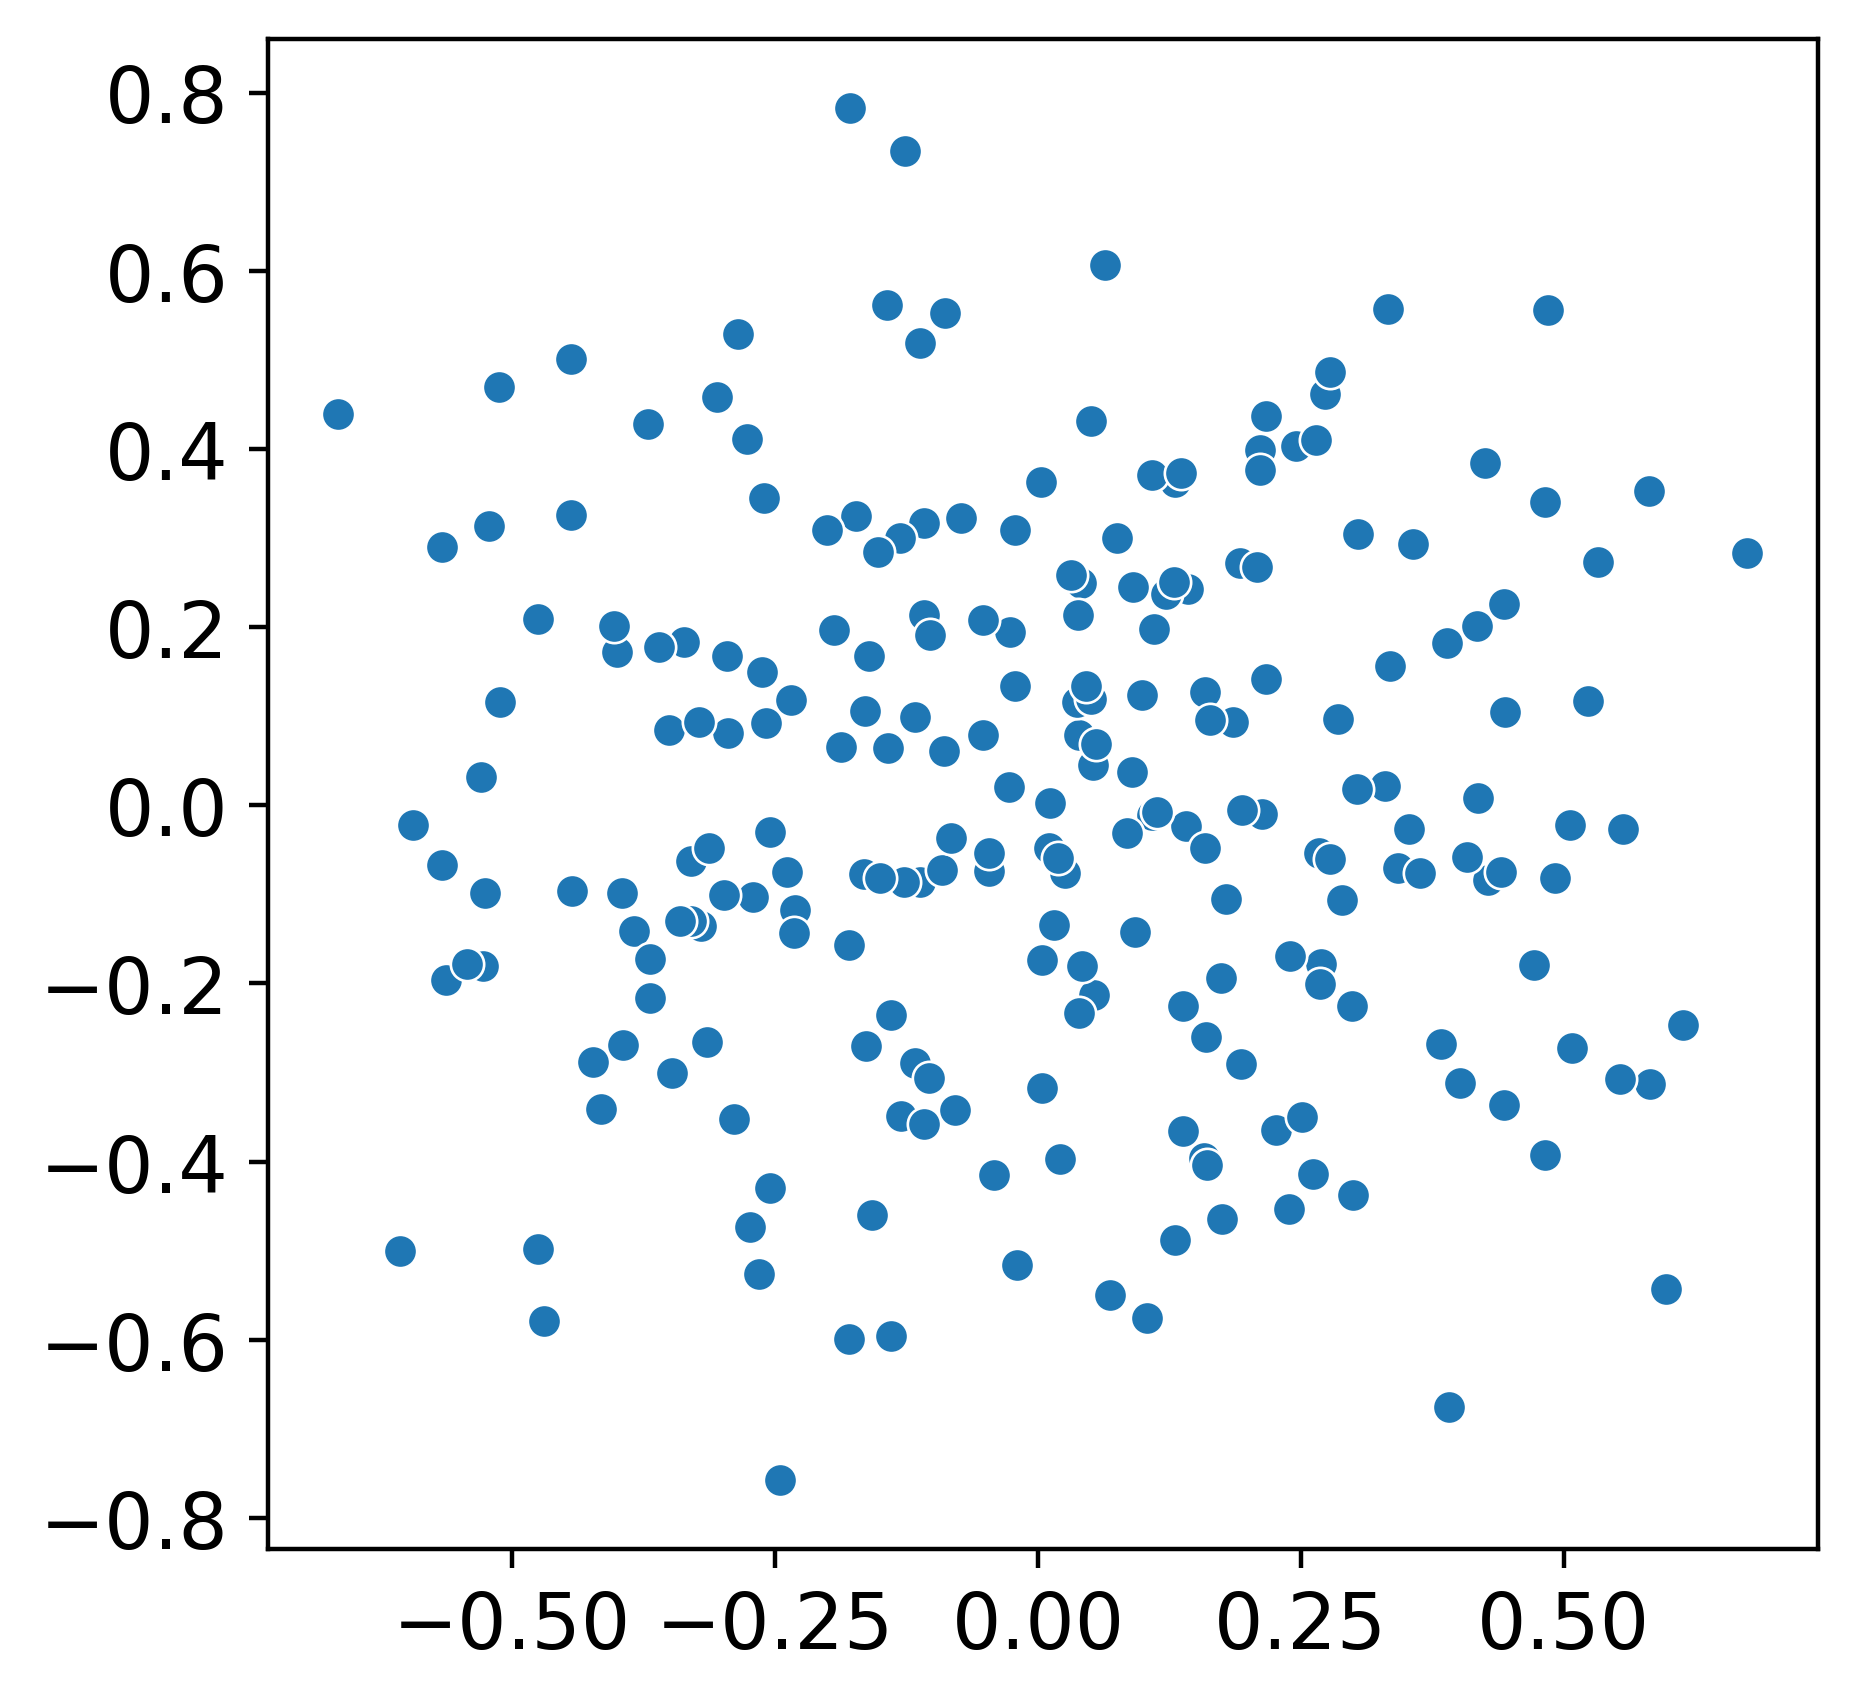

In [117]:
from sklearn.decomposition import PCA
import matplotlib.ticker as ticker
#using principal composnent analysis to embed high-dimentional data to low-dimentional data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pd.DataFrame(X_train).values)

fig = plt.figure(figsize=(5,5))

g = sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])
g.set(xscale='linear', yscale='linear');

#fig.savefig('figures/PCA-40omicro_points.svg',dpi=400)

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 225 samples in 0.001s...
[t-SNE] Computed neighbors for 225 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 225 / 225
[t-SNE] Mean sigma: 0.035166
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.620888
[t-SNE] KL divergence after 300 iterations: 2.399265


<AxesSubplot:>

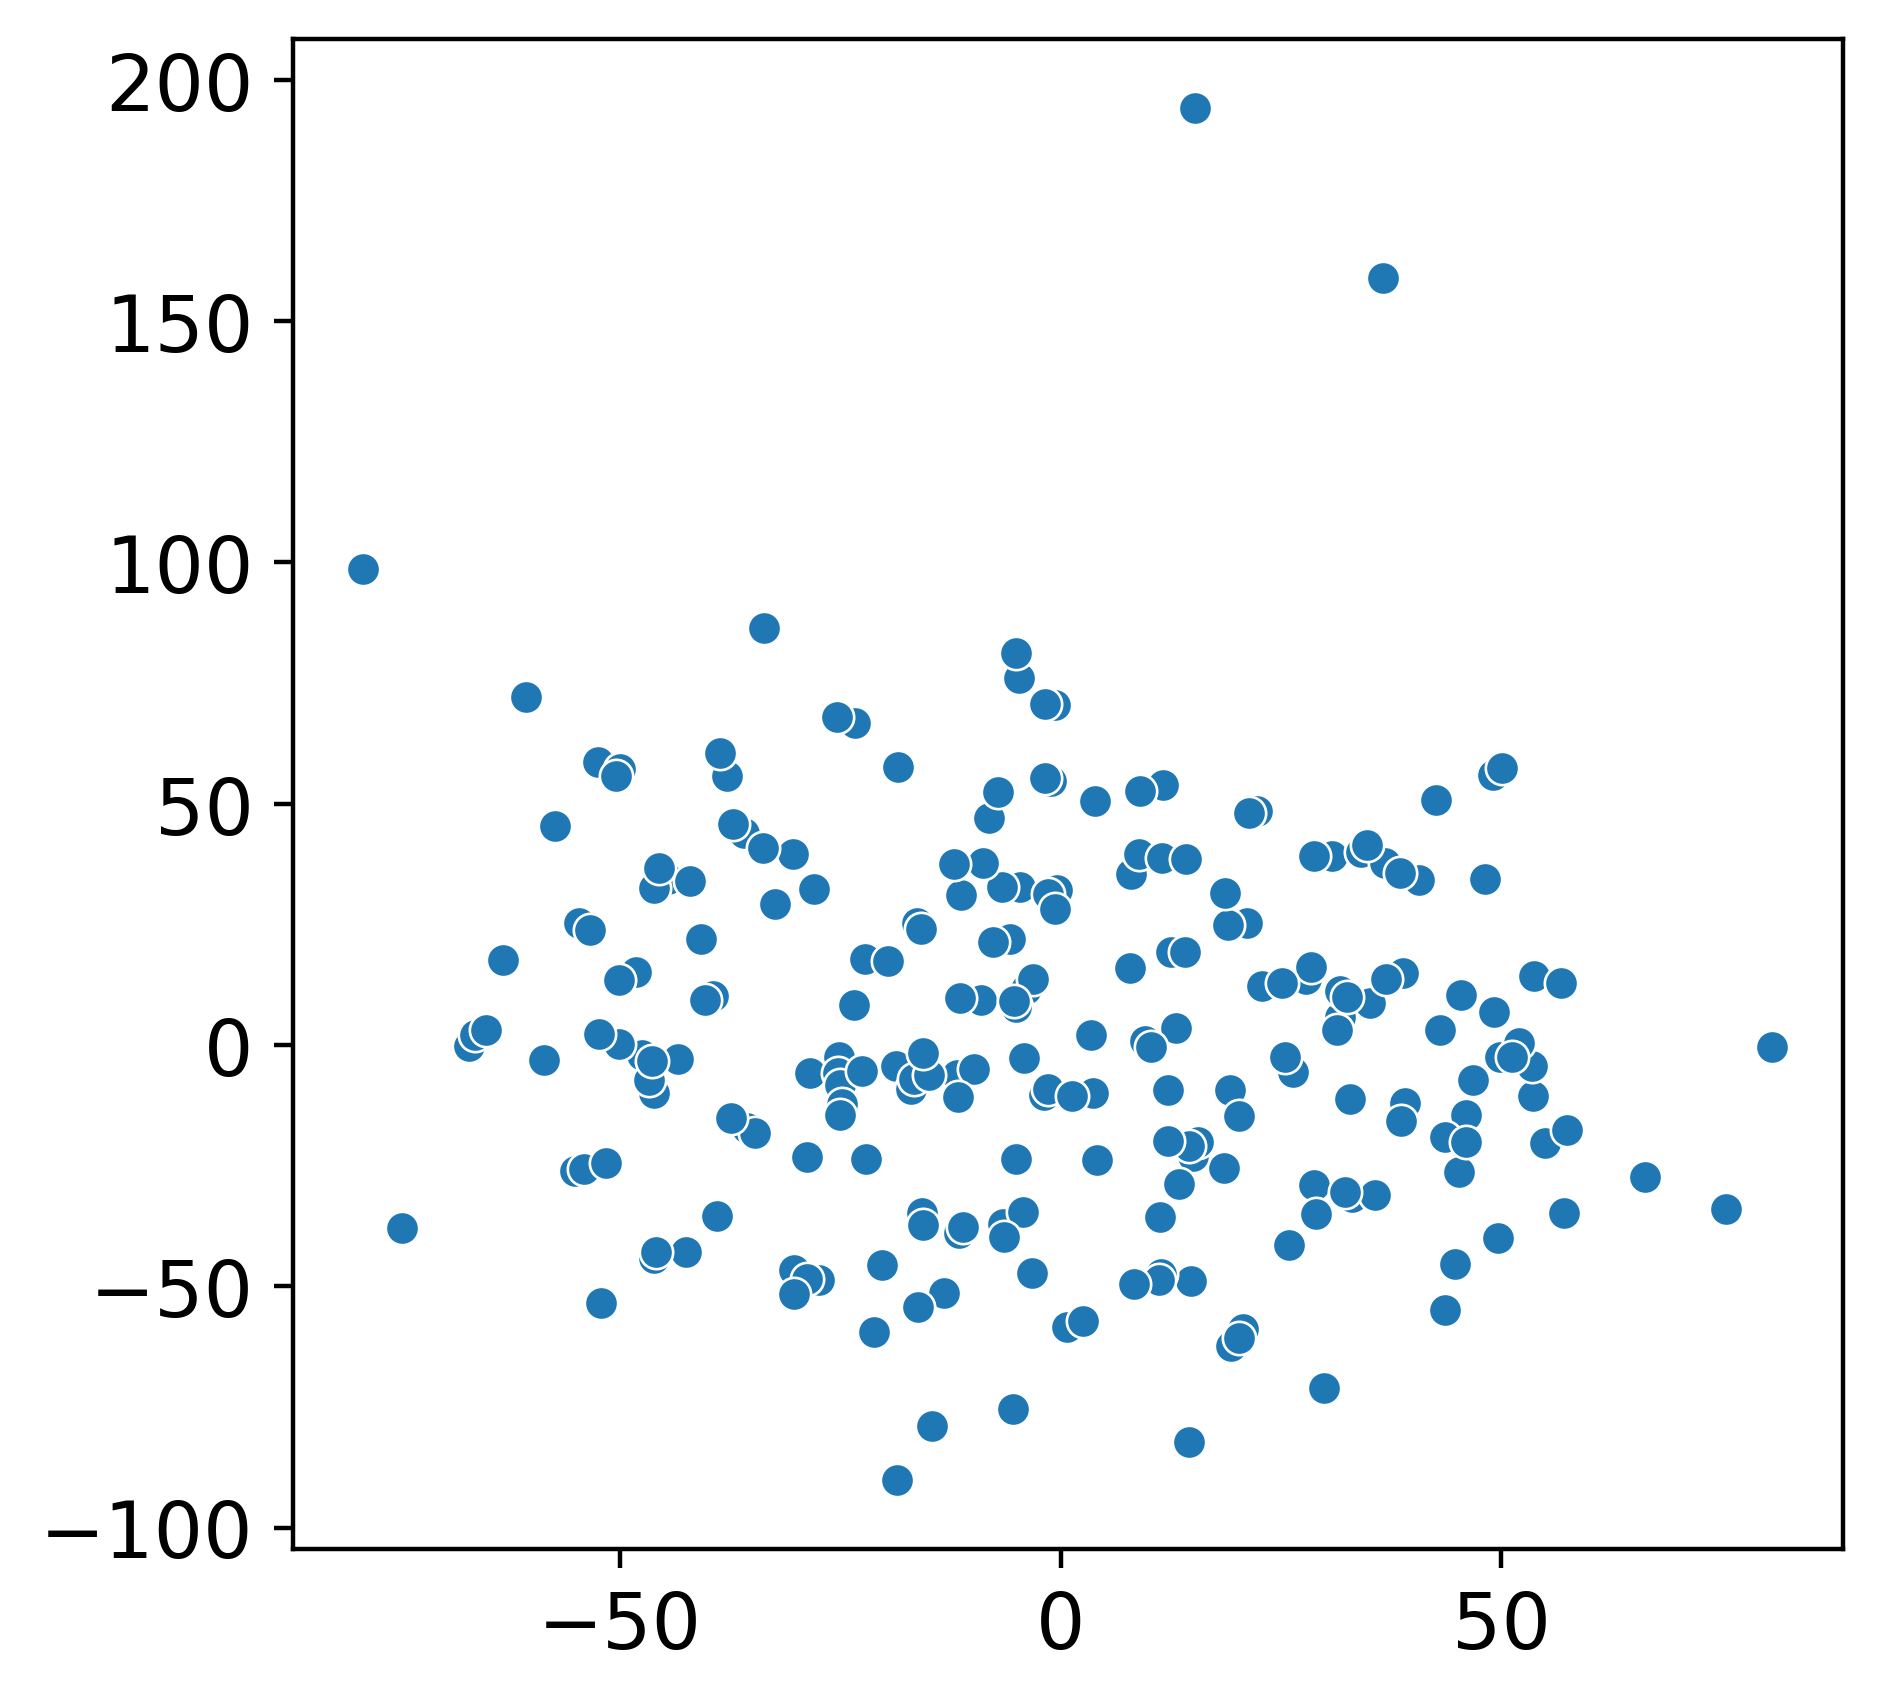

In [118]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=1, n_iter=300, learning_rate=200)
tsne_results = tsne.fit_transform(pd.DataFrame(X_train).values)

plt.figure(figsize=(5,5))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1])

In [119]:
# description of input and output in Dataframe format: 
yy_test=pd.DataFrame(y_test,columns = ['E11','E22','nu12','nu13','nu23','G12','G13','G23'])
yy_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
E11,75.0,0.380440,0.234223,-0.066674,0.208261,0.356651,0.526895,0.970325
E22,75.0,0.208480,0.144070,-0.044555,0.102695,0.187027,0.282891,0.776393
nu12,75.0,0.473936,0.238163,0.009085,0.282777,0.469272,0.656691,0.944576
nu13,75.0,0.466058,0.237676,-0.002915,0.300897,0.454478,0.662132,0.926446
nu23,75.0,0.367671,0.245165,0.045027,0.163815,0.322908,0.506992,0.985444
G12,75.0,0.391059,0.229539,-0.079410,0.219780,0.353033,0.541675,0.986180
G13,75.0,0.358978,0.216842,-0.066713,0.201188,0.315502,0.489411,0.946122
G23,75.0,0.218799,0.151783,-0.056602,0.098425,0.199844,0.316279,0.751064


#Check validity of inputs (no NaNs or sometimes 0s).
df.isnull().any()

# Neural network model implementation

In [120]:
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

In [121]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(8)
]) #Set the finer layer neuron number based on the number of desired outputs

#############################################################################
            #after the model is created compile() is called to specify the loss function and optimizer 
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.Adam(lr=1e-5),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
            # or optimizer = 'sgd'
            # "sgd" means the simple Stochastic Gradient Descent
            # The learning rate "lr" can be set after the default value = 0.01
##############################################################################
#to save the loss history og the model to load it on demand:
from keras.callbacks import CSVLogger
#check if there is a log file or not first
csv_logger = CSVLogger('models/training_full_dataset.log', separator=',', append=False)
#model.fit(X_train, y_train, validation_split=0.1, epochs=2000, callbacks=[csv_logger])

history = model.fit(X_train, y_train, epochs=2000, validation_split=0.1)
            # Keras will measure the loss and the extra metrics on validation set at the end of each EPOCH
            # if performance is better on validation set than the training set >> overfitting problem or data mismatch
            # And that's it! the neural network is trained
##############################################################################
            # Once you're satisfied with your model's validation accuracy, 
            # it's time to evaluate the model on test set
mse_test = model.evaluate(X_test, y_test)
    
            # make prediction on the first three instance of the test set, since we had not any other data:

y_absolute = y_test [:3]
y_pred = model.predict(X_test[:3])

Epoch 1/2000
7/7 [==============================] - 0s 37ms/step - loss: 0.1938 - root_mean_squared_error: 0.4402 - val_loss: 0.1688 - val_root_mean_squared_error: 0.4108
Epoch 2/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1925 - root_mean_squared_error: 0.4388 - val_loss: 0.1677 - val_root_mean_squared_error: 0.4095
Epoch 3/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1914 - root_mean_squared_error: 0.4374 - val_loss: 0.1667 - val_root_mean_squared_error: 0.4082
Epoch 4/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1902 - root_mean_squared_error: 0.4361 - val_loss: 0.1656 - val_root_mean_squared_error: 0.4069
Epoch 5/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1890 - root_mean_squared_error: 0.4348 - val_loss: 0.1646 - val_root_mean_squared_error: 0.4057
Epoch 6/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1879 - root_mean_squared_error: 0.4334 - val_loss: 0.1635 - val_root_mean_s

Epoch 49/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1482 - root_mean_squared_error: 0.3850 - val_loss: 0.1274 - val_root_mean_squared_error: 0.3570
Epoch 50/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1473 - root_mean_squared_error: 0.3838 - val_loss: 0.1266 - val_root_mean_squared_error: 0.3558
Epoch 51/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1464 - root_mean_squared_error: 0.3827 - val_loss: 0.1258 - val_root_mean_squared_error: 0.3546
Epoch 52/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1455 - root_mean_squared_error: 0.3815 - val_loss: 0.1249 - val_root_mean_squared_error: 0.3535
Epoch 53/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1447 - root_mean_squared_error: 0.3804 - val_loss: 0.1241 - val_root_mean_squared_error: 0.3523
Epoch 54/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1438 - root_mean_squared_error: 0.3791 - val_loss: 0.1232 - val_root_m

Epoch 97/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1016 - root_mean_squared_error: 0.3188 - val_loss: 0.0842 - val_root_mean_squared_error: 0.2901
Epoch 98/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.1006 - root_mean_squared_error: 0.3172 - val_loss: 0.0833 - val_root_mean_squared_error: 0.2886
Epoch 99/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0996 - root_mean_squared_error: 0.3156 - val_loss: 0.0824 - val_root_mean_squared_error: 0.2870
Epoch 100/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0986 - root_mean_squared_error: 0.3140 - val_loss: 0.0815 - val_root_mean_squared_error: 0.2855
Epoch 101/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0976 - root_mean_squared_error: 0.3125 - val_loss: 0.0806 - val_root_mean_squared_error: 0.2840
Epoch 102/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0967 - root_mean_squared_error: 0.3109 - val_loss: 0.0798 - val_roo

Epoch 145/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0609 - root_mean_squared_error: 0.2468 - val_loss: 0.0490 - val_root_mean_squared_error: 0.2214
Epoch 146/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0602 - root_mean_squared_error: 0.2454 - val_loss: 0.0485 - val_root_mean_squared_error: 0.2202
Epoch 147/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0596 - root_mean_squared_error: 0.2441 - val_loss: 0.0479 - val_root_mean_squared_error: 0.2190
Epoch 148/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0590 - root_mean_squared_error: 0.2428 - val_loss: 0.0474 - val_root_mean_squared_error: 0.2178
Epoch 149/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0583 - root_mean_squared_error: 0.2415 - val_loss: 0.0469 - val_root_mean_squared_error: 0.2166
Epoch 150/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0577 - root_mean_squared_error: 0.2402 - val_loss: 0.0464 - val_

7/7 [==============================] - 0s 5ms/step - loss: 0.0386 - root_mean_squared_error: 0.1964 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1766
Epoch 193/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0382 - root_mean_squared_error: 0.1956 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1759
Epoch 194/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0379 - root_mean_squared_error: 0.1948 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1753
Epoch 195/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0377 - root_mean_squared_error: 0.1941 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1747
Epoch 196/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0374 - root_mean_squared_error: 0.1933 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1740
Epoch 197/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0371 - root_mean_squared_error: 0.1926 - val_loss: 0.0301 - val_root_mean_squar

Epoch 240/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0288 - root_mean_squared_error: 0.1697 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1553
Epoch 241/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0287 - root_mean_squared_error: 0.1693 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1550
Epoch 242/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0285 - root_mean_squared_error: 0.1689 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1547
Epoch 243/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0284 - root_mean_squared_error: 0.1685 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1544
Epoch 244/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0283 - root_mean_squared_error: 0.1681 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1541
Epoch 245/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0281 - root_mean_squared_error: 0.1677 - val_loss: 0.0237 - val_

7/7 [==============================] - 0s 5ms/step - loss: 0.0234 - root_mean_squared_error: 0.1531 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1432
Epoch 288/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0233 - root_mean_squared_error: 0.1527 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1429
Epoch 289/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1427
Epoch 290/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0231 - root_mean_squared_error: 0.1521 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1424
Epoch 291/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0230 - root_mean_squared_error: 0.1518 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1422
Epoch 292/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0229 - root_mean_squared_error: 0.1514 - val_loss: 0.0202 - val_root_mean_squar

Epoch 335/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1319
Epoch 336/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0188 - root_mean_squared_error: 0.1370 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1317
Epoch 337/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0187 - root_mean_squared_error: 0.1367 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1315
Epoch 338/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0186 - root_mean_squared_error: 0.1363 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1313
Epoch 339/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0185 - root_mean_squared_error: 0.1360 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1310
Epoch 340/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.0184 - root_mean_squared_error: 0.1357 - val_loss: 0.0171 - val

7/7 [==============================] - 0s 5ms/step - loss: 0.0150 - root_mean_squared_error: 0.1227 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1216
Epoch 383/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1214
Epoch 384/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0149 - root_mean_squared_error: 0.1221 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1212
Epoch 385/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0148 - root_mean_squared_error: 0.1218 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1209
Epoch 386/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1207
Epoch 387/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0147 - root_mean_squared_error: 0.1212 - val_loss: 0.0145 - val_root_mean_squar

Epoch 430/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0120 - root_mean_squared_error: 0.1095 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 431/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1115
Epoch 432/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0119 - root_mean_squared_error: 0.1090 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1113
Epoch 433/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0118 - root_mean_squared_error: 0.1087 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1111
Epoch 434/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1109
Epoch 435/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0123 - val_

7/7 [==============================] - 0s 6ms/step - loss: 0.0095 - root_mean_squared_error: 0.0975 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1023
Epoch 478/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0095 - root_mean_squared_error: 0.0972 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1022
Epoch 479/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0094 - root_mean_squared_error: 0.0970 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1020
Epoch 480/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0094 - root_mean_squared_error: 0.0968 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1018
Epoch 481/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0093 - root_mean_squared_error: 0.0965 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1016
Epoch 482/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0093 - root_mean_squared_error: 0.0963 - val_loss: 0.0103 - val_root_mean_squar

Epoch 525/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0076 - root_mean_squared_error: 0.0873 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0942
Epoch 526/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0076 - root_mean_squared_error: 0.0871 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0941
Epoch 527/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0075 - root_mean_squared_error: 0.0869 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0939
Epoch 528/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0075 - root_mean_squared_error: 0.0867 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0938
Epoch 529/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0075 - root_mean_squared_error: 0.0865 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0936
Epoch 530/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0074 - root_mean_squared_error: 0.0863 - val_loss: 0.0087 - val_

7/7 [==============================] - 0s 5ms/step - loss: 0.0063 - root_mean_squared_error: 0.0793 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0877
Epoch 573/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0063 - root_mean_squared_error: 0.0791 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0876
Epoch 574/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0062 - root_mean_squared_error: 0.0790 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0874
Epoch 575/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0062 - root_mean_squared_error: 0.0788 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0873
Epoch 576/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0062 - root_mean_squared_error: 0.0787 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0873
Epoch 577/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0062 - root_mean_squared_error: 0.0785 - val_loss: 0.0076 - val_root_mean_squar

Epoch 620/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0053 - root_mean_squared_error: 0.0728 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0822
Epoch 621/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0053 - root_mean_squared_error: 0.0727 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0821
Epoch 622/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0820
Epoch 623/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0052 - root_mean_squared_error: 0.0724 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0819
Epoch 624/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0052 - root_mean_squared_error: 0.0723 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0818
Epoch 625/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0052 - root_mean_squared_error: 0.0722 - val_loss: 0.0067 - val_

7/7 [==============================] - 0s 5ms/step - loss: 0.0046 - root_mean_squared_error: 0.0676 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0776
Epoch 668/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0046 - root_mean_squared_error: 0.0675 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0775
Epoch 669/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0045 - root_mean_squared_error: 0.0674 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0774
Epoch 670/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0045 - root_mean_squared_error: 0.0673 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0773
Epoch 671/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0045 - root_mean_squared_error: 0.0672 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0772
Epoch 672/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0045 - root_mean_squared_error: 0.0671 - val_loss: 0.0059 - val_root_mean_squar

Epoch 715/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0040 - root_mean_squared_error: 0.0631 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0734
Epoch 716/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0733
Epoch 717/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0733
Epoch 718/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0040 - root_mean_squared_error: 0.0629 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0731
Epoch 719/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0628 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0730
Epoch 720/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0627 - val_loss: 0.0053 - val_

7/7 [==============================] - 0s 5ms/step - loss: 0.0035 - root_mean_squared_error: 0.0594 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0696
Epoch 763/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0696
Epoch 764/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0035 - root_mean_squared_error: 0.0592 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 765/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0035 - root_mean_squared_error: 0.0592 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0694
Epoch 766/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0693
Epoch 767/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0035 - root_mean_squared_error: 0.0590 - val_loss: 0.0048 - val_root_mean_squar

Epoch 810/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0560 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0662
Epoch 811/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0661
Epoch 812/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0661
Epoch 813/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0558 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0661
Epoch 814/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0557 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 815/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0557 - val_loss: 0.0044 - val_

7/7 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0632
Epoch 858/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0530 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 859/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0028 - root_mean_squared_error: 0.0530 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 860/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0529 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 861/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0529 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0630
Epoch 862/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0528 - val_loss: 0.0040 - val_root_mean_squar

Epoch 905/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0026 - root_mean_squared_error: 0.0505 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0607
Epoch 906/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0505 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0607
Epoch 907/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0025 - root_mean_squared_error: 0.0504 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0607
Epoch 908/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0504 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0607
Epoch 909/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0606
Epoch 910/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0037 - val_

7/7 [==============================] - 0s 8ms/step - loss: 0.0023 - root_mean_squared_error: 0.0483 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0587
Epoch 953/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0023 - root_mean_squared_error: 0.0483 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0587
Epoch 954/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0023 - root_mean_squared_error: 0.0483 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0587
Epoch 955/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0023 - root_mean_squared_error: 0.0482 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0586
Epoch 956/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0023 - root_mean_squared_error: 0.0482 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0585
Epoch 957/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0023 - root_mean_squared_error: 0.0481 - val_loss: 0.0034 - val_root_mean_squar

Epoch 1000/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0571
Epoch 1001/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0570
Epoch 1002/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0569
Epoch 1003/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0569
Epoch 1004/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 1005/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0464 - val_loss: 0.0032 

7/7 [==============================] - 0s 6ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0555
Epoch 1048/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0554
Epoch 1049/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0451 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0553
Epoch 1050/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0451 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0553
Epoch 1051/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0020 - root_mean_squared_error: 0.0450 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0553
Epoch 1052/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0020 - root_mean_squared_error: 0.0450 - val_loss: 0.0031 - val_root_mean_

7/7 [==============================] - 0s 6ms/step - loss: 0.0019 - root_mean_squared_error: 0.0439 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0542
Epoch 1095/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0019 - root_mean_squared_error: 0.0439 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0542
Epoch 1096/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0439 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0541
Epoch 1097/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0541
Epoch 1098/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0541
Epoch 1099/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0029 - val_root_mean_

7/7 [==============================] - 0s 6ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0530
Epoch 1142/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0530
Epoch 1143/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0530
Epoch 1144/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0529
Epoch 1145/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0529
Epoch 1146/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0018 - root_mean_squared_error: 0.0427 - val_loss: 0.0028 - val_root_mean_

7/7 [==============================] - 0s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0521
Epoch 1189/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0520
Epoch 1190/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0521
Epoch 1191/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0520
Epoch 1192/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0520
Epoch 1193/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.0018 - root_mean_squared_error: 0.0418 - val_loss: 0.0027 - val_root_mean

7/7 [==============================] - 0s 7ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512
Epoch 1236/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0513
Epoch 1237/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512
Epoch 1238/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512
Epoch 1239/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0017 - root_mean_squared_error: 0.0410 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512
Epoch 1240/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0017 - root_mean_squared_error: 0.0410 - val_loss: 0.0026 - val_root_mean_

7/7 [==============================] - 0s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0504
Epoch 1283/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0504
Epoch 1284/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0503
Epoch 1285/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0503
Epoch 1286/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0503
Epoch 1287/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402 - val_loss: 0.0025 - val_root_mean_

7/7 [==============================] - 0s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0497
Epoch 1330/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0497
Epoch 1331/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0497
Epoch 1332/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0496
Epoch 1333/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0395 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0497
Epoch 1334/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0395 - val_loss: 0.0025 - val_root_mean_

7/7 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0390 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 1377/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 1378/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 1379/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 1380/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 1381/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389 - val_loss: 0.0024 - val_root_mean_

7/7 [==============================] - 0s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0485
Epoch 1424/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0485
Epoch 1425/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0485
Epoch 1426/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0485
Epoch 1427/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0485
Epoch 1428/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0024 - val_root_mean_

7/7 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 1471/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 1472/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 1473/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 1474/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 1475/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0023 - val_root_mean_

7/7 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0476
Epoch 1518/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0476
Epoch 1519/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0476
Epoch 1520/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0476
Epoch 1521/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0475
Epoch 1522/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0023 - val_root_mean_

7/7 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0367 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0472
Epoch 1565/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - root_mean_squared_error: 0.0367 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0473
Epoch 1566/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - root_mean_squared_error: 0.0367 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0472
Epoch 1567/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0367 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0472
Epoch 1568/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0367 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0472
Epoch 1569/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0367 - val_loss: 0.0022 - val_root_mean_

7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - root_mean_squared_error: 0.0362 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 1612/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - root_mean_squared_error: 0.0362 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 1613/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - root_mean_squared_error: 0.0362 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 1614/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - root_mean_squared_error: 0.0362 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 1615/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0013 - root_mean_squared_error: 0.0362 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 1616/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0362 - val_loss: 0.0022 - val_root_mean_

7/7 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0358 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0466
Epoch 1659/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0358 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0466
Epoch 1660/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0358 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0465
Epoch 1661/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0357 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0466
Epoch 1662/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0357 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0465
Epoch 1663/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0358 - val_loss: 0.0021 - val_root_mean_

7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0463
Epoch 1706/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0463
Epoch 1707/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 1708/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0463
Epoch 1709/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 1710/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0021 - val_root_mean_

7/7 [==============================] - 0s 7ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 1753/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0461
Epoch 1754/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0461
Epoch 1755/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0460
Epoch 1756/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0460
Epoch 1757/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 0.0021 - val_root_mean_

7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0457
Epoch 1800/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0458
Epoch 1801/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0459
Epoch 1802/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0459
Epoch 1803/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0458
Epoch 1804/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0021 - val_root_mean_

7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0341 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0457
Epoch 1847/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0341 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 1848/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 1849/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0341 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 1850/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 1851/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 0.0021 - val_root_mean_

7/7 [==============================] - 0s 7ms/step - loss: 0.0011 - root_mean_squared_error: 0.0337 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0453
Epoch 1894/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0454
Epoch 1895/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0337 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 1896/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 1897/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0454
Epoch 1898/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 0.0021 - val_root_mean_

7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0333 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0452
Epoch 1941/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0333 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0452
Epoch 1942/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0332 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 1943/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0332 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 1944/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0332 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0452
Epoch 1945/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0332 - val_loss: 0.0020 - val_root_mean_

7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0449
Epoch 1988/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 1989/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 1990/2000
7/7 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 1991/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 1992/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0020 - val_root_mean_

In [122]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 520       
Total params: 13,384
Trainable params: 13,384
Non-trainable params: 0
_________________________________________________________________


In [123]:
pwd

'C:\\Users\\xghaeh\\C Documents\\Ehsan code\\Phase 1 project on elasticity'

The SAVE function saves:

* the architecture of the model, allowing to re-create the model,
* the weights of the model,
* the training configuration (loss, optimizer),
* the state of the opotimizer, allowing to resume training exactly where you left off.

In [124]:
#old and wrong method of saving ans loading the NN model
#model.save('Predictor')
#model.load('Predictor')
#print("weights:", len(layer.weights))
#print("trainable_weights:", len(layer.trainable_weights))
#print("non_trainable_weights:", len(layer.non_trainable_weights))

#to load the saved model:
from tensorflow.keras.models import load_model

new_model = load_model('models/Predictor_full_dataset.h5')

new_model.summary()

 some comments to look into the model
* new_model.get_weights()
* new_model.optimizer

In [125]:
print(model.history)

In [126]:
loss_metrices = pd.DataFrame(history.history)

In [127]:
loss_metrices.keys()

Index(['loss', 'root_mean_squared_error', 'val_loss',
       'val_root_mean_squared_error'],
      dtype='object')

In [128]:
loss_metrices['root_mean_squared_error']

0       0.440193
1       0.438791
2       0.437442
3       0.436083
4       0.434755
          ...   
1995    0.032782
1996    0.032774
1997    0.032789
1998    0.032789
1999    0.032759
Name: root_mean_squared_error, Length: 2000, dtype: float64

In [129]:
# how to count the number of hyperparameters or training parameters of the network
model.count_params()

13384

In [130]:
history.params

{'verbose': 1, 'epochs': 2000, 'steps': 7}

In [131]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

In [132]:
pd.DataFrame(history.history)
#pd.DataFrame(history.history).to_excel("output_case5.xlsx") 

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,0.193770,0.440193,0.168765,0.410810
1,0.192538,0.438791,0.167708,0.409522
2,0.191356,0.437442,0.166655,0.408235
3,0.190168,0.436083,0.165607,0.406948
4,0.189012,0.434755,0.164567,0.405668
...,...,...,...,...
1995,0.001075,0.032782,0.002010,0.044829
1996,0.001074,0.032774,0.002016,0.044899
1997,0.001075,0.032789,0.002020,0.044940
1998,0.001075,0.032789,0.002014,0.044877


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl
from matplotlib import rc

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['savefig.dpi'] = 400

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams["font.family"] = 'DejaVu Sans'

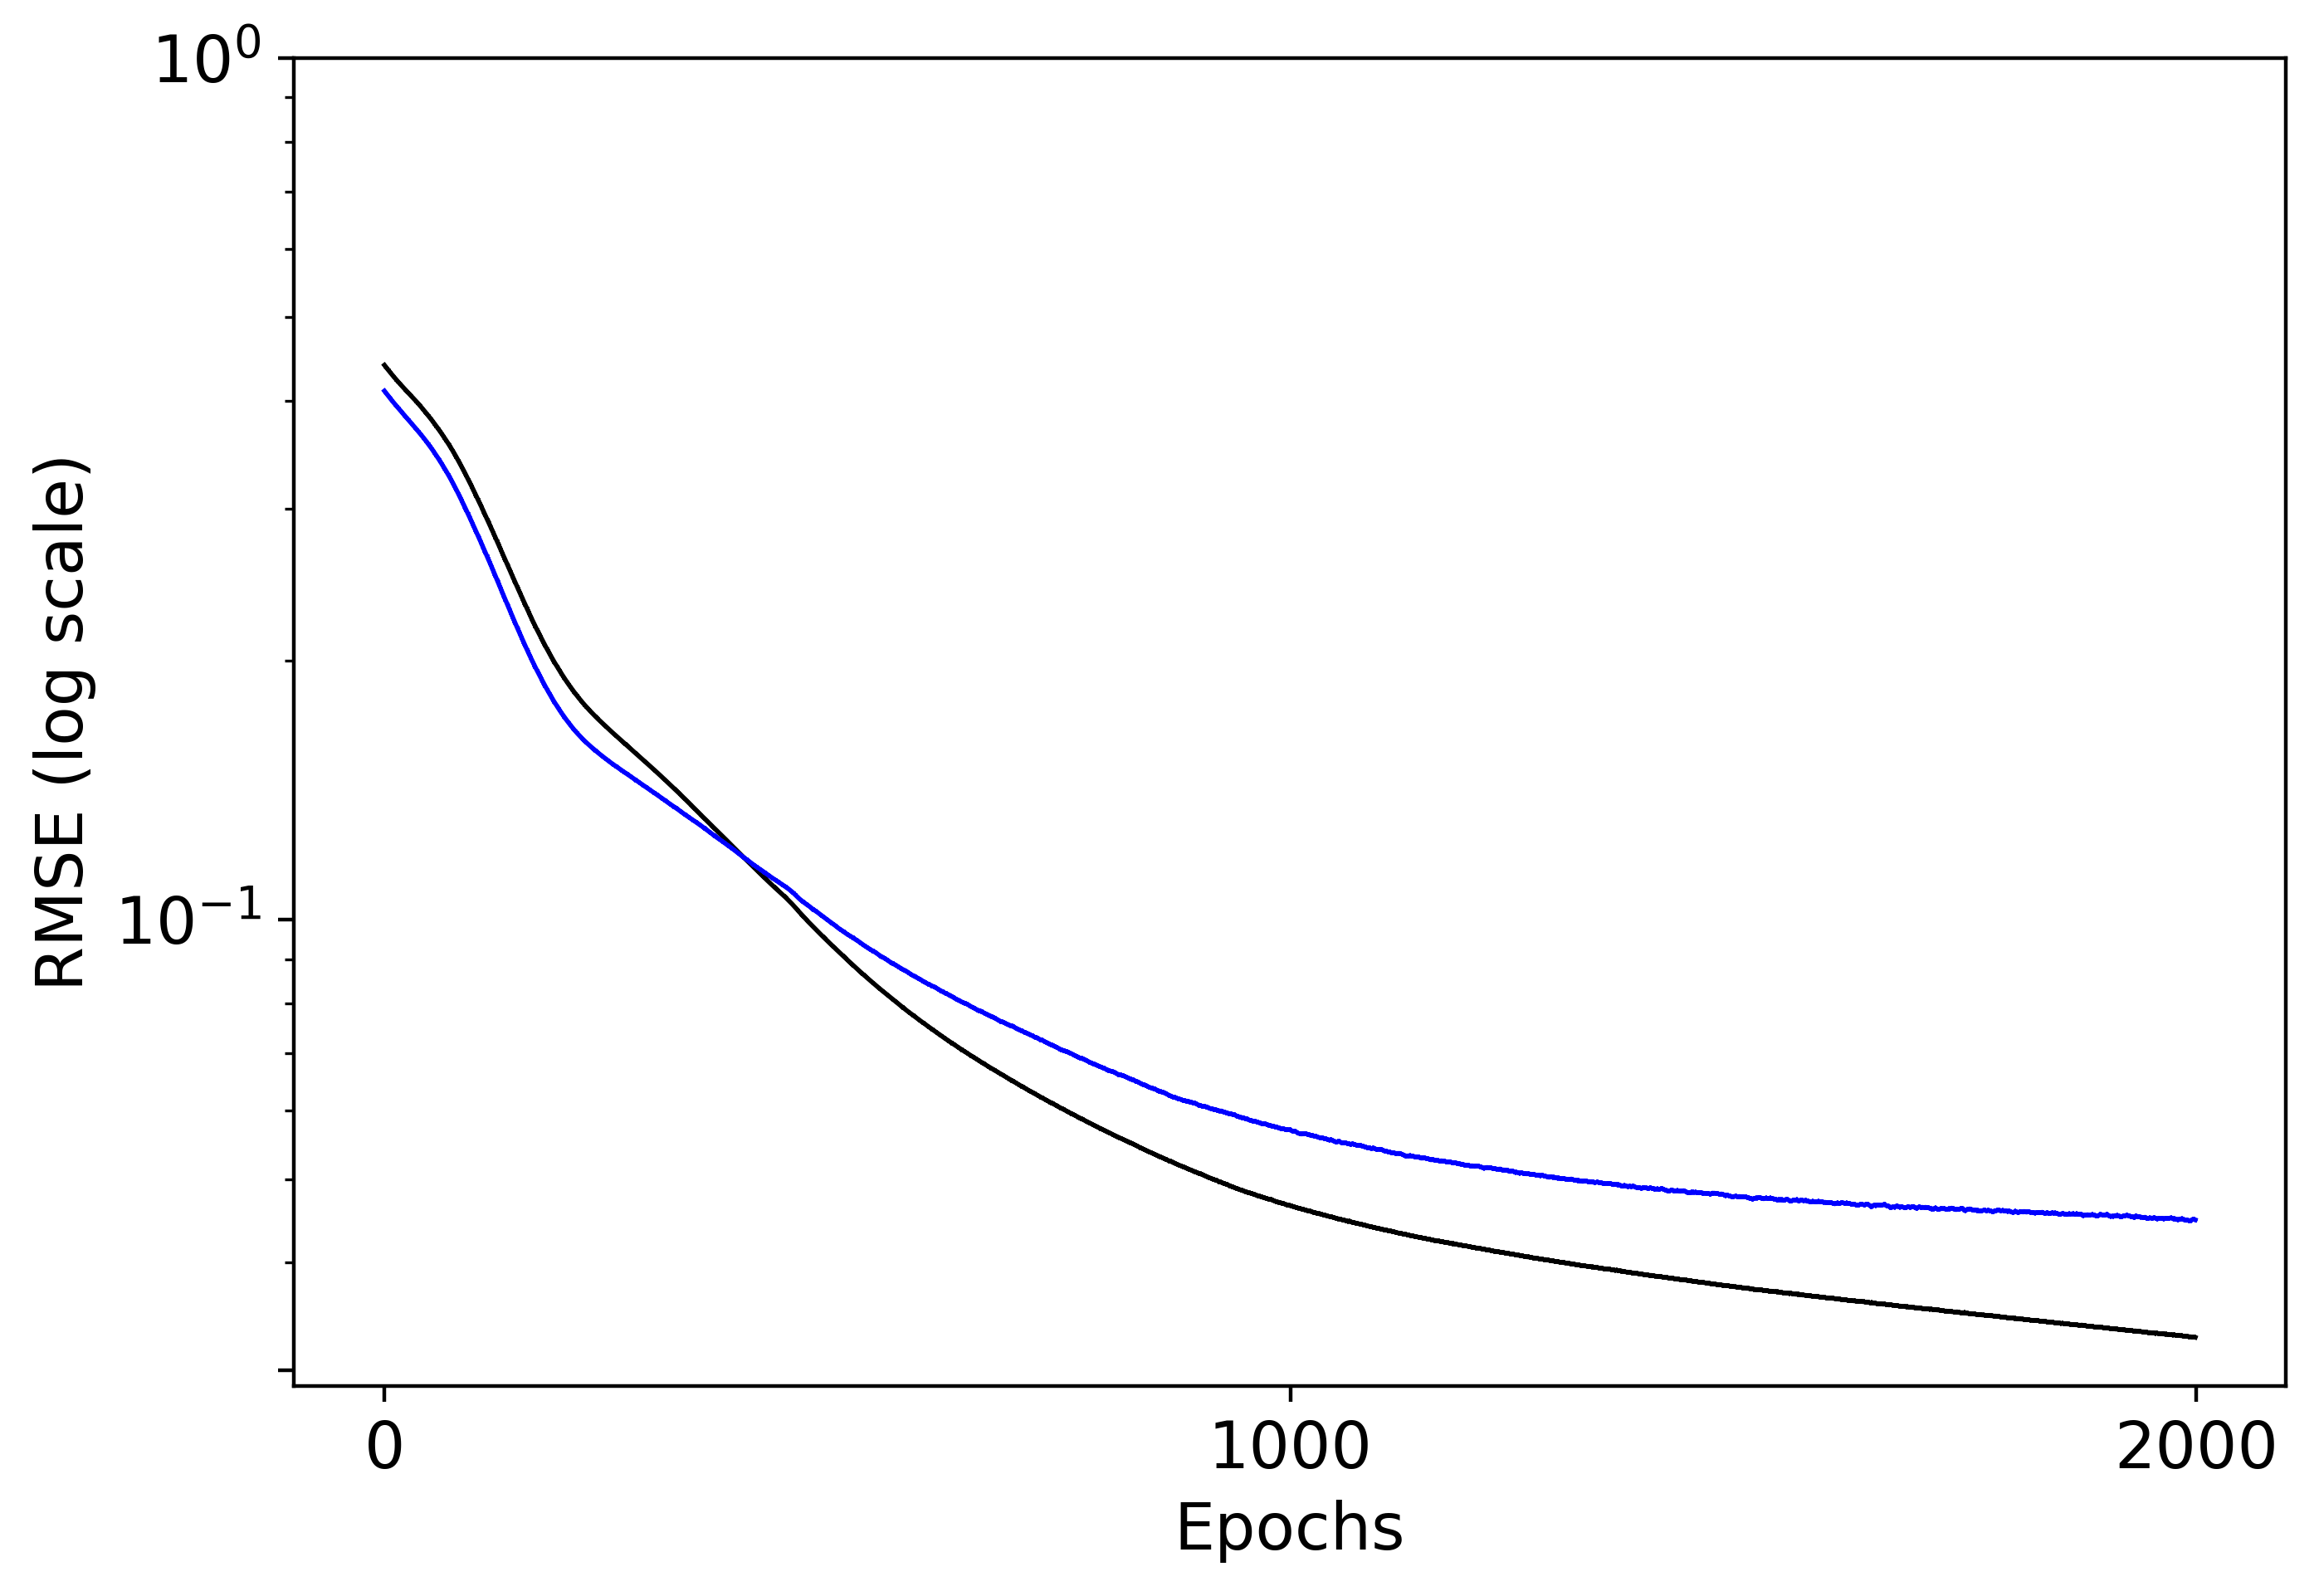

In [135]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator, MaxNLocator)
import matplotlib.ticker as ticker

fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))

#ax2 = plt.twinx(ax)
#ax2.plot(loss_metrices['loss'],label = 'Loss training set', color='red', marker='+', linestyle='-', linewidth=1, markersize=.5)
#ax2.plot(loss_metrices['val_loss'],label = 'Loss validation set', color='orange', marker='+', linestyle='-', linewidth=1, markersize=.5)
#ax2.set_ylabel('Loss', fontsize=14)
#ax2.set_yscale('log')


ax.plot(loss_metrices['root_mean_squared_error'],label = 'RMSE training set', color='black', marker='+', linestyle='-', linewidth=1, markersize=.5)
ax.plot(loss_metrices['val_root_mean_squared_error'],label = 'RMSE validation set', color='blue', marker='+', linestyle='-', linewidth=1, markersize=.5)
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('RMSE (log scale)', fontsize=14)
ax.set_yscale('log')

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
#ax2.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
# Set the y-axis limits and tick values
#ax.set_ylim([3*10**-2, 10**0])
ax.set_yticks([3*10**-2, 10**-1, 10**0])

#ax2.xaxis.set_major_locator(MultipleLocator(1000))
#ax2.yaxis.set_major_locator(MultipleLocator(0.1))
#ax2.yaxis.set_major_formatter(FormatStrFormatter('%1.2f'))
#ax2.xaxis.set_major_formatter(FormatStrFormatter('%d'))

ax.xaxis.set_major_locator(MultipleLocator(1000))
#ax.yaxis.set_major_locator(ticker.NullLocator())
#ax.yaxis.set_major_formatter(FormatStrFormatter('%1.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

#to locate the legends in an arbitary position use bbox
#to remove border arround the legends use frameon=0

#fig.legend(loc='upper right', bbox_to_anchor=(1, 1),frameon=0)
#plt.plot(loss_metrices['root_mean_squared_error'])
plt.grid(False)
fig.savefig('E:\\1_PhD projects\\1_Publications\\First paper\\figures\\Micro_loss_epochs_300.svg')

In [ ]:
mse_test

# Model prediction on the test set

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_tr = model.predict(X_train)

In [ ]:
#counting the Mean sq. error on the test set: 
MSE_test=tf.keras.metrics.mean_squared_error(y_test, y_pred)
MSE_test = pd.DataFrame(MSE_test)

In [ ]:
# Save y_test for monitoring as a pandas dataframe
y_test1=y_test
#type(y_test1)>>numpy.ndarray

In [ ]:
#__check if there is any null element 
# y_test1.isnull().any()

In [ ]:
y_test=pd.DataFrame(y_test,columns = ['E11','E22','nu12','nu13','nu23','G12','G13','G23'])
y_test.describe().transpose()

# residuals

In [ ]:
residualsE11 = 100*(y_test['E11']-y_pred[:,0])/y_test['E11']
residualsE22 = 100*(y_test['E22']-y_pred[:,1])/y_test['E22']

residualsNu12 = 100*(y_test['nu12']-y_pred[:,2])/y_test['nu12']
residualsNu13 = 100*(y_test['nu13']-y_pred[:,3])/y_test['nu13']
residualsNu23 = 100*(y_test['nu23']-y_pred[:,4])/y_test['nu23']

residualsG12 = 100*(y_test['G12']-y_pred[:,5])/y_test['G12']
residualsG13 = 100*(y_test['G13']-y_pred[:,6])/y_test['G13']
residualsG23 = 100*(y_test['G23']-y_pred[:,7])/y_test['G23']

Creating a JointGrid in seaborn, you have created three axes, the main ax_joint, and the two marginal axes.
To plot something else on the joint axes, we can access the joint grid using sns.JointGrid.ax_joint, and then create plot objects on there as you would with any other matplotlib Axes object.

you can also access the marginal axes of a JointGrid in a similar way:
* sns.JointGrid.ax_marg_x.plot(...)
* sns.JointGrid.ax_marg_y.plot(...)

In [ ]:
jp = sns.JointGrid(height=6, ratio=6, space=0, xlim=[-2,101], ylim=[-65,65],)
sns.scatterplot(data = residualsE11, ax=jp.ax_joint, color='black', marker='o', label='$E_{11} (\mathrm{GPa})$')
sns.scatterplot(data = residualsNu12, ax=jp.ax_joint, color='red', marker='p',label=r'$\nu_{12}$')
sns.scatterplot(data = residualsG12,ax=jp.ax_joint, color='green', marker='d',label='$G_{12} (\mathrm{GPa})$')
#plot a line in grid part:
jp.ax_joint.plot([0,100], [0,0], ':', linewidth = 1, color='b')
jp.ax_joint.xaxis.set_major_locator(ticker.NullLocator())
jp.ax_joint.yaxis.set_major_locator(MultipleLocator(40))
jp.ax_joint.legend(loc='upper right', bbox_to_anchor=(1, 1),frameon=1)

sns.kdeplot(x=None, y= residualsE11, fill=True, color='black',label='$E_{11} (\mathrm{GPa})$', alpha=.4, edgecolor=".2", linewidth=.5)
sns.kdeplot(x=None, y= residualsNu12, fill=True, color='red',label=r'$\nu_{12}$',alpha=.3, edgecolor=".2", linewidth=.5)
sns.kdeplot(x=None, y= residualsG12, fill=True, color='green',label='$G_{12} (\mathrm{GPa})$',alpha=.3, edgecolor=".2", linewidth=.5)

#set grid lines for marginal plot
jp.ax_marg_y.tick_params(labeltop=True )
jp.ax_marg_y.grid(True, axis='x', ls=':', color='blue')
#jp.ax_marg_y.xaxis.set_major_locator(MaxNLocator(1))
jp.ax_marg_y.xaxis.set(major_locator=MultipleLocator(0.066), major_formatter=FormatStrFormatter('%2.1f'))

plt.axhline(y=0, color='b', linestyle=':', linewidth = 1) #zero line in distribution


jp.set_axis_labels(xlabel='Unseen data point ID', ylabel='Residual percentage[%]')

jp.fig.set_figwidth(6.4)
jp.fig.set_figheight(4.8)

jp.savefig('E://1_PhD projects//1_Publications//First paper//figures//Micro_ANN_Residuals_400_1.svg');

In [ ]:
jp = sns.JointGrid(height=6, ratio=6, space=0, xlim=[-2,101], ylim=[-65,65],)
sns.scatterplot(data = residualsG13, ax=jp.ax_joint, color='black', marker='o', label='$G_{13} (\mathrm{GPa})$')
sns.scatterplot(data = residualsNu13, ax=jp.ax_joint, color='red', marker='p',label=r'$\nu_{13}$')
sns.scatterplot(data = residualsG23,ax=jp.ax_joint, color='green', marker='d',label='$G_{23} (\mathrm{GPa})$')
#plot a line in grid part:
jp.ax_joint.plot([0,100], [0,0], ':', linewidth = 1, color='b')
jp.ax_joint.xaxis.set_major_locator(ticker.NullLocator())
jp.ax_joint.yaxis.set_major_locator(MultipleLocator(40))
jp.ax_joint.legend(loc='upper right', bbox_to_anchor=(1, 1),frameon=1)

sns.kdeplot(x=None, y= residualsG13, fill=True, color='black',label='$G_{13} (\mathrm{GPa})$', alpha=.4, edgecolor=".2", linewidth=.5)
sns.kdeplot(x=None, y= residualsNu13, fill=True, color='red',label=r'$\nu_{13}$',alpha=.3, edgecolor=".2", linewidth=.5)
sns.kdeplot(x=None, y= residualsG23, fill=True, color='green',label='$G_{23} (\mathrm{GPa})$',alpha=.3, edgecolor=".2", linewidth=.5)

#set grid lines for marginal plot
jp.ax_marg_y.tick_params(labeltop=True )
jp.ax_marg_y.grid(True, axis='x', ls=':', color='blue')
#jp.ax_marg_y.xaxis.set_major_locator(MaxNLocator(1))
jp.ax_marg_y.xaxis.set(major_locator=MultipleLocator(0.043), major_formatter=FormatStrFormatter('%2.1f'))

plt.axhline(y=0, color='b', linestyle=':', linewidth = 1) #zero line in distribution


jp.set_axis_labels(xlabel='Unseen data point ID', ylabel='Residual percentage[%]')

jp.fig.set_figwidth(6.4)
jp.fig.set_figheight(4.8)

jp.savefig('E://1_PhD projects//1_Publications//First paper//figures//Micro_ANN_Residuals_400_2.svg');

In [ ]:
import statsmodels.api as sm
#A Q-Q plot, short for “quantile-quantile” plot, is often used to assess whether or not a set of data potentially came from some theoretical distribution. 
#In most cases, this type of plot is used to determine whether or not a set of data follows a normal distribution.
fig = sm.qqplot(data=residualsG12, line='45')
plt.show()

In [ ]:
#compute standard deviation of residuals as a estimator of the NN performance
std_resi = np.zeros(8)

import statistics

std_resi[0] = statistics.pstdev(y_test['E11']-y_pred[:,0])
std_resi[1] =statistics.pstdev(y_test['E22']-y_pred[:,1])
std_resi[2] =statistics.pstdev((y_test['nu12']-y_pred[:,2]))
std_resi[3] =statistics.pstdev((y_test['nu13']-y_pred[:,3]))
std_resi[4] =statistics.pstdev((y_test['nu23']-y_pred[:,4]))
std_resi[5] =statistics.pstdev((y_test['G12']-y_pred[:,5]))
std_resi[6] =statistics.pstdev((y_test['G13']-y_pred[:,6]))
std_resi[7] =statistics.pstdev((y_test['G23']-y_pred[:,7]))
#print(std_resi.reshape(8,1))

## convert your array into a dataframe
df_std_resi = pd.DataFrame (std_resi,
                           index=['E11','E22','nu12','nu13','nu23','G12','G13','G23'])


## save to xlsx file
df_std_resi.to_excel('Micro_std_residuals.xlsx', 
                     sheet_name='std_residuals', 
                     float_format= "%.3f",
                     header=['std'])


Insert #Kullback-Leibler Divergence to calculate the divergence between two propebilities

# Plot the prediction scatering

In [ ]:
# Apply inverse scaleing
y_test1 = scaler1.inverse_transform(y_test1)
y_pred = scaler1.inverse_transform(y_pred)
y_train = scaler1.inverse_transform(y_train)
y_pred_tr = scaler1.inverse_transform(y_pred_tr)

In [ ]:
fig=plt.figure()

ax=fig.add_axes([0,0,1,1])
ax.scatter(y_test1[:,2] , y_pred[:,2] , color='red', label = 'test set', alpha=.7 , edgecolors='none')
ax.scatter(y_train[:,2] , y_pred_tr[:,2] , color='black', label= 'training set',alpha=.6, marker='1')
x0 = np.array([y_test1[:,2].min(), y_test1[:,2].max()]) # instead of [0,1] as the plot border
y0 = x0
ax.plot(x0,y0, label='ideal')



#ax.scatter(y_test1[:,3] , y_pred[:,3], color='b')
ax.set_xlabel(r'Expected $\nu_{12}$')
ax.set_ylabel(r'Observed $\nu_{12}$')
#ax.set_title('predicted vs. test micromechanical UD Poissons ratio')
plt.legend()
plt.show

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
# ['E11','E22','nu12','nu13','nu23','G12','G13','G23'] 
# Parameters at the axes level



axes[0][0].scatter(y_test1[:,0]/1e3 , y_pred[:,0]/1e3 , color='r', marker='1')
x00 = 1e-3*np.array([y_test1[:,0].min(), y_test1[:,0].max()]) # instead of [0,1] as the plot border
y00 = x00
axes[0][0].plot(x00,y00)

axes[0][1].scatter(y_test1[:,1]/1e3 , y_pred[:,1]/1e3, color='g', marker='2')
x01= 1e-3*np.array([y_test1[:,1].min(), y_test1[:,1].max()])
y01=x01
axes[0][1].plot(x01,y01)

axes[0][2].scatter(y_test1[:,2] , y_pred[:,2], color='b', marker='3')
x02 = np.array([y_test1[:,2].min(),y_test1[:,2].max()])
y02 = x02
axes[0][2].plot(x02,y02)

axes[1][0].scatter(y_test1[:,4] , y_pred[:,4], color='y', marker='+')
x10 = np.array([y_test1[:,4].min(),y_test1[:,4].max()])
y10=x10
axes[1][0].plot(x10,y10)

axes[1][1].scatter(y_test1[:,5]/1e3 , y_pred[:,5]/1e3, color='c', marker='*')
x11 = 1e-3*np.array([y_test1[:,5].min(), y_test1[:,5].max()])
y11=x11
axes[1][1].plot(x11,y11)

axes[1][2].scatter(y_test1[:,6]/1e3 , y_pred[:,6]/1e3, color='black', marker='4')
x12 = 1e-3*np.array([y_test1[:,6].min(), y_test1[:,6].max()])
y12=x12
axes[1][2].plot(x12,y12)
#_______________________________________
# ['E11','E22','nu12','nu13','nu23','G12','G13','G23'] 

axes[0][0].set_ylabel('Predicted $E_{11} (\mathrm{GPa})$')
axes[0][1].set_ylabel('Predicted $E_{22} (\mathrm{GPa})$')
axes[0][2].set_ylabel(r'Predicted $\nu_{12}$')
axes[1][0].set_ylabel(r'Predicted $\nu_{23}$')
axes[1][1].set_ylabel('Predicted $G_{12} (\mathrm{GPa})$')
axes[1][2].set_ylabel('Predicted $G_{23} (\mathrm{GPa})$')

axes[0][0].set_xlabel('Expected $E_{11} (\mathrm{GPa})$')
axes[0][1].set_xlabel('Expected $E_{22} (\mathrm{GPa})$')
axes[0][2].set_xlabel(r'Expected $\nu_{12}$')
axes[1][0].set_xlabel(r'Expected $\nu_{23}$')
axes[1][1].set_xlabel('Expected $G_{12} (\mathrm{GPa})$')
axes[1][2].set_xlabel('Expected $G_{23} (\mathrm{GPa})$')

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
#axes[0][0].set_xlim(1e-3*np.array([y_test1[:,0].min(), y_test1[:,0].max()])) #set the starting point
#axes[0][0].set_ylim(1e-3*np.array([y_test1[:,0].min(), y_test1[:,0].max()]))
axes[0][0].xaxis.set_major_locator(MultipleLocator(100))
axes[0][0].yaxis.set_major_locator(MultipleLocator(100))
axes[0][1].xaxis.set_major_locator(MultipleLocator(20))
axes[0][1].yaxis.set_major_locator(MultipleLocator(20))
axes[0][2].xaxis.set_major_locator(MultipleLocator(.07))
axes[0][2].yaxis.set_major_locator(MultipleLocator(.07))
axes[1][0].xaxis.set_major_locator(MultipleLocator(.18))
axes[1][0].yaxis.set_major_locator(MultipleLocator(.18))
axes[1][1].xaxis.set_major_locator(MultipleLocator(5))
axes[1][1].yaxis.set_major_locator(MultipleLocator(5))
axes[1][2].xaxis.set_major_locator(MultipleLocator(5))
axes[1][2].yaxis.set_major_locator(MultipleLocator(5))


plt.tight_layout()
# Use left,right,top, bottom to stretch subplots
# Use wspace,hspace to add spacing between subplots
fig.subplots_adjust(
    left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=.45,
    hspace=.45,)


#______set_title('microscale UD 3D elastic properties. Predicted by ANN vs. FE simulations in Digimat')
# to use scientific number on bars : plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()


In [ ]:
# Save just the portion _inside_ the second axis's boundaries
extent0 = axes[0][0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent1 = axes[0][1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent2 = axes[0][2].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent3 = axes[1][0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent4 = axes[1][1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent5 = axes[1][2].get_window_extent().transformed(fig.dpi_scale_trans.inverted())

fig.savefig('figures/MicroE11.png', bbox_inches=extent0.expanded(1.6, 1.45))
fig.savefig('figures/MicroE22.png', bbox_inches=extent1.expanded(1.55, 1.45))
fig.savefig('figures/MicroV12.png', bbox_inches=extent2.expanded(1.6, 1.45))
fig.savefig('figures/MicroV23.png', bbox_inches=extent3.expanded(1.55, 1.45))
fig.savefig('figures/MicroG12.png', bbox_inches=extent4.expanded(1.55, 1.45))
fig.savefig('figures/MicroG23.png', bbox_inches=extent5.expanded(1.6, 1.45))

# Analytical model prediction

In [ ]:
#Analytical model prediction
#ref2:https://www.sciencedirect.com/science/article/pii/S1359836819313794#bbib60
####################################
#import math as m
#m.sqrt(4)
#but math.sqrt operator dows not work on dataframes, instead you should use numpy.sqrt
####################################
#Chamis(CH) model based on rule of mixture
df['CH_E11'] = df['EM']+ df['phiF']*(df['EF']-df['EM'])
#
df['CH_E22'] = df['EM']/((1-np.sqrt(df['phiF']))*(1-(df['EM']/df['EF'])))
#
#Isotropic fiber assumption, although carbon fibers are actually transversly isotropic and have 5 independent properties
df['GM'] = df['EM'] / 2*(1+df['nuM'])
df['GF'] = df['EF'] / 2*(1+df['nuF'])
df['CH_G12'] = df['GM']/((1-np.sqrt(df['phiF']))*(1-(df['GM']/df['GF'])))
#
df['CH_nu12'] = df['nuM']+ df['phiF']*(df['nuF']-df['nuM'])
####################################
#Halpin-Tsai(HT) model based on rule of mixture
#
df['zeta_E22'] =2+40*df['phiF']**10
df['eta_E22'] =((df['EF']/df['EM'])-1)/((df['EF']/df['EM'])+df['zeta_E22'])
df['HT_E22'] = df['EM']*((1+df['zeta_E22']*df['eta_E22']*df['phiF'])/(1-df['eta_E22']*df['phiF']))
#
df['zeta_G12'] =1+40*df['phiF']**10
df['eta_G12'] =((df['GF']/df['GM'])-1)/((df['GF']/df['GM'])+df['zeta_G12'])
df['HT_G12'] = df['GM']*((1+df['zeta_G12']*df['eta_G12']*df['phiF'])/(1-df['eta_G12']*df['phiF']))


In [ ]:
df.describe().transpose()

In [ ]:
import csv

# open the file in the write mode
with open('nu12', 'w', encoding='UTF8') as f:
    # create the csv writer
    writer = csv.writer(f)
    #header = ["j", "i" ,"y_test1[:,1][j]","y_pred[:,1][j]","df['HT_E22'][i]","df['CH_E22'][i]"]
    header = ["j", "i" ,"y_test1[2]","y_pred[2]","HT_G12","CH_nu12", "nuF", "nuM", "phiF"]
    # write a row to the csv file
    writer.writerow(header)
    j=0
    for i in indices_test:
        # write a row to the csv file
        writer.writerow([j, i ,y_test1[:,2][j],y_pred[:,2][j],df['HT_G12'][i],df['CH_nu12'][i],df['nuF'][j],df['nuM'][j],df['phiF'][j]])
        j+=1


In [ ]:
prediction = pd.read_csv("nu12")

In [ ]:
prediction.columns

In [ ]:
fig=plt.figure()

ax=fig.add_axes([0,0,1,1])
ax.scatter(prediction['phiF'] , prediction['y_test1[2]']/prediction['nuF'] , color='red', label = 'actual test set', alpha=.7 , edgecolors='none')
ax.scatter(prediction['phiF'] , prediction['CH_nu12']/prediction['nuF'] , color='black', label= 'CH model',alpha=.6, marker='1')
ax.scatter(prediction['phiF'] , prediction['y_pred[2]']/prediction['nuF'] , color='blue', label= 'Micro-ANN',alpha=.6, marker='1')
#x0 = np.array([y_test1[:,2].min(), y_test1[:,2].max()]) # instead of [0,1] as the plot border
#y0 = x0
#ax.plot(x0,y0, label='ideal')



#ax.scatter(y_test1[:,3] , y_pred[:,3], color='b')
ax.set_xlabel(r'$\nu_F$')
ax.set_ylabel(r'$\nu_{12}/\nu_f$')
#ax.set_title('predicted vs. test micromechanical UD Poissons ratio')
plt.legend()
plt.show

In [ ]:
prediction['y_CH'] = (prediction['CH_nu12']-prediction['y_test1[2]'])/prediction['y_test1[2]']
prediction['y_ANN'] = (prediction['y_pred[2]']-prediction['y_test1[2]'])/prediction['y_test1[2]']

In [ ]:
fig=plt.figure()

ax=fig.add_axes([0,0,1,1])
#ax.scatter(prediction['phiF'] , prediction['y_test1[2]']/prediction['nuF'] , color='red', label = 'actual test set', alpha=.7 , edgecolors='none')
ax.scatter(prediction['phiF'] , prediction['y_CH'] , color='red', label= 'CH model',alpha=.6, marker='1')
ax.scatter(prediction['phiF'] , prediction['y_ANN'] , color='blue', label= 'Micro-ANN',alpha=.6, marker='1')
plt.axhline(y=0, color='b', linestyle=':')

ax.set_xlabel('$V_F$')
ax.set_ylabel(r'$\nu_{12}/\nu_f$')
#ax.set_title('predicted vs. test micromechanical UD Poissons ratio')
plt.legend()
plt.show

In [ ]:
# setup the plot with JointGrid
g = sns.JointGrid()
x ,y , z = prediction.phiF, prediction.y_CH, prediction.y_ANN

# add scatter plot
sns.scatterplot(x=x, y=y, ax=g.ax_joint, color='black', marker='^',label=r'$\nu_{12}^{CH}$')
sns.scatterplot(x=x, y=z, ax=g.ax_joint, color='blue', marker='o',label=r'$\nu_{12}^{ANN}$')
plt.axhline(y=0, color='b', linestyle=':')
# add marginal density plot layer
sns.kdeplot(x=None, y=y, fill=True, color='black',label=r'$\nu_{12}^{CH}$')
sns.kdeplot(x=None, y=z, fill=True, color='blue',label=r'$\nu_{12}^{CH}$');

plt.axhline(y=0, color='b', linestyle=':')

{'axes.labelcolor': '.15',
'axes.set_xlabel':'$V_F$',
'axes.set_ylabel':r'$\nu_{12}/\nu_f$',
'axes.set_xticklabels':'[.3,.6]',
'axes.set_yticklabels':'[-.1,.1]'};
#g.savefig('25jointgrid_image_thumb.png', dpi=200);

In [ ]:
#new data set has been generated based on the sobol sequene technique using the function "Design_of_experiments"
#__new data has already been exported and scaled: 
'''extended_inp = pd.read_excel('SobolDistributedData.xlsx',
                             sheet_name='Extension',
                             index_col=0)
extended_inp.describe().transpose()'''